In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
PATH = "C:\\Users\\Lukman\\Superstore.csv"
raw_df = pd.read_csv(PATH, encoding='windows-1252')
df = raw_df.copy()

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [31]:
import pandas as pd

PATH = "C:\\Users\\Lukman\\Super_store.csv"
raw_df = pd.read_csv(PATH, encoding='windows-1252')
df = raw_df.copy()

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

print(df)


      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
3          6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
4         11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
...      ...             ...         ...         ...             ...   
2116    9963  CA-2015-168088   3/19/2015   3/22/2015     First Class   
2117    9965  CA-2016-146374   12/5/2016  12/10/2016    Second Class   
2118    9981  US-2015-151435    9/6/2015    9/9/2015    Second Class   
2119    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
2120    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1  

In [52]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [51]:
df.shape

(9994, 21)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [49]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [48]:
import pandas as pd
import numpy as np

print(np.unique(df['Category'], return_counts=True))
print(np.unique(df['Sub-Category'], return_counts=True))


(array(['Furniture', 'Office Supplies', 'Technology'], dtype=object), array([2121, 6026, 1847], dtype=int64))
(array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object), array([ 775,  466,  796, 1523,  228,  617,   68,  254,  217,  957,  364,
        115, 1370,  889,  846,  190,  319], dtype=int64))


In [47]:
print(np.unique(df['Product Name'], return_counts=True))

(array(['"While you Were Out" Message Book, One Form per Page',
       '#10 Gummed Flap White Envelopes, 100/Box',
       '#10 Self-Seal White Envelopes', ..., 'iOttie XL Car Mount',
       'invisibleSHIELD by ZAGG Smudge-Free Screen Protector',
       'netTALK DUO VoIP Telephone Service'], dtype=object), array([3, 4, 4, ..., 2, 7, 7], dtype=int64))


In [46]:
print(df['Product Name'].nunique())

1850


In [30]:
print(df['Product Name'].value_counts())

KI Adjustable-Height Table                                                                    18
Staple-based wall hangings                                                                    16
Situations Contoured Folding Chairs, 4/Set                                                    15
Eldon Wave Desk Accessories                                                                   14
Global Wood Trimmed Manager's Task Chair, Khaki                                               14
Global High-Back Leather Tilter, Burgundy                                                     14
SAFCO Arco Folding Chair                                                                      13
Chromcraft Round Conference Tables                                                            13
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back                                   12
Eldon Expressions Wood Desk Accessories, Oak                                                  12
Bretford Rectangular Conferenc

In [45]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [44]:
print(type(df['Ship Date'].iloc[0]))
print(type(df['Order Date'].iloc[0]))      

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [42]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

print(type(df['Ship Date'].iloc[0]))
print(type(df['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [41]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [45]:
np.unique(df['Segment'], return_counts=True)

(array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 array([1113,  646,  362], dtype=int64))

In [60]:
pip install matplotlib

In [67]:
pip install seaborn


     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ----- --------------------------------- 41.0/293.3 kB 1.9 MB/s eta 0:00:01
     --------------- ---------------------- 122.9/293.3 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.3 MB/s eta 0:00:00


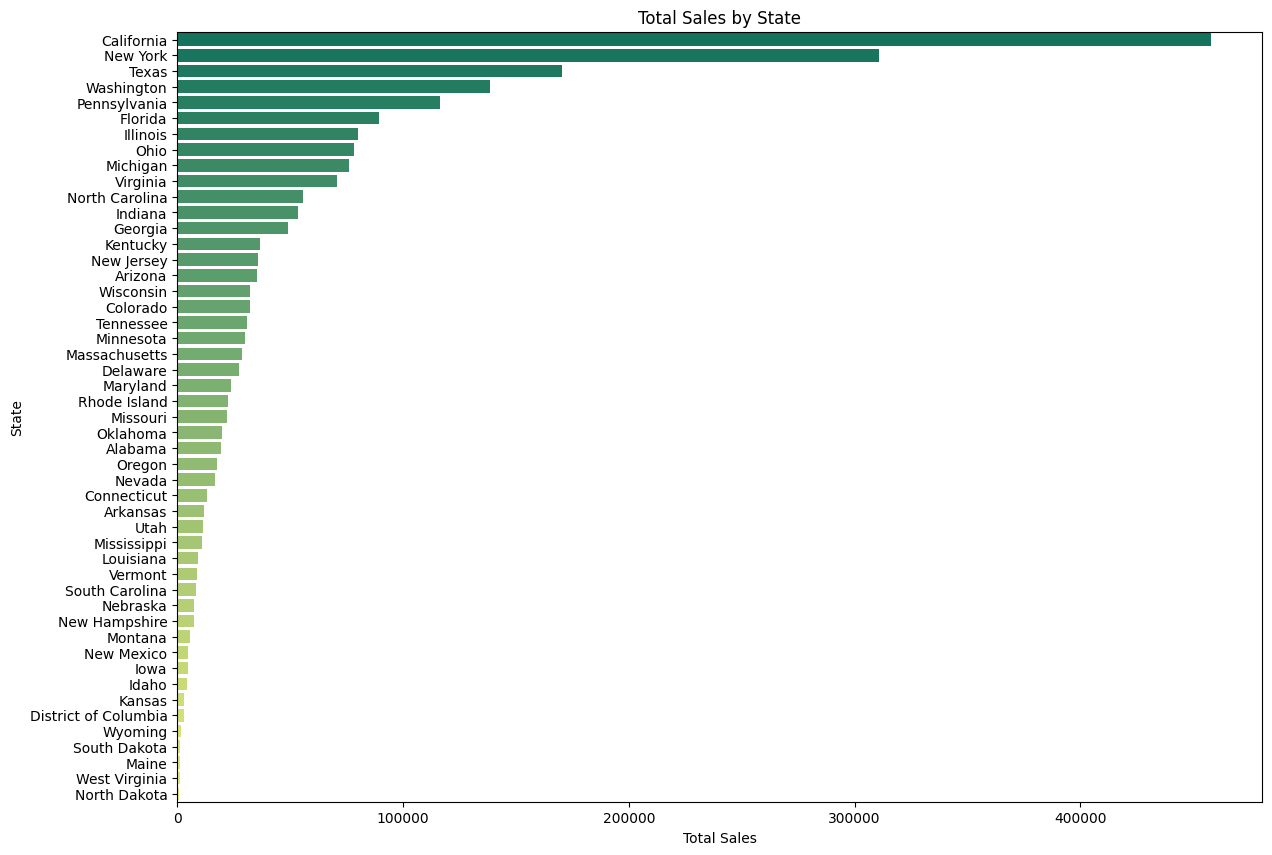

In [40]:
figure = plt.figure(figsize=(14,10))

grouped_df = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
g = sns.barplot(x='Sales', y='State', data=grouped_df, palette='summer')
g.set_title('Total Sales by State')
g.set_xlabel('Total Sales')
plt.show(g)

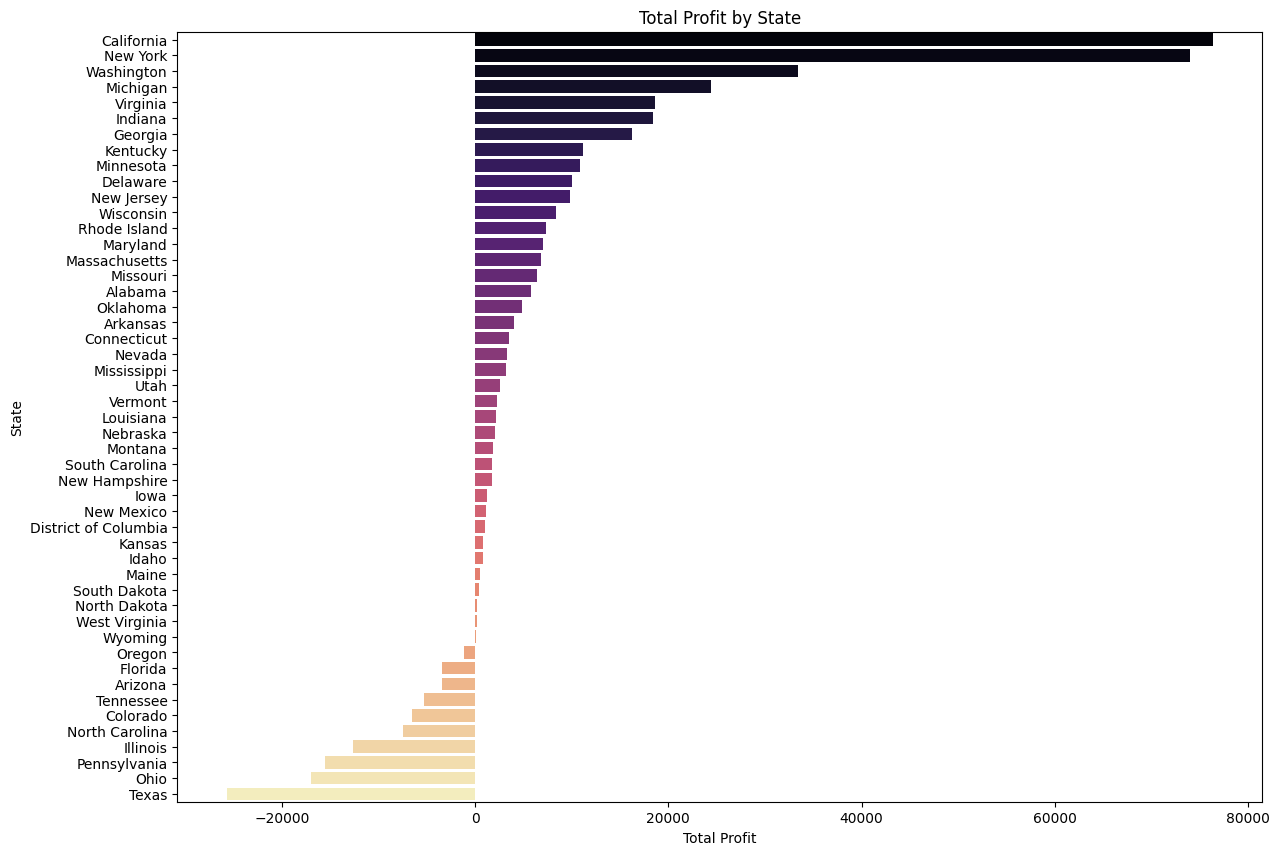

In [39]:
import seaborn as sns
figure = plt.figure(figsize=(14,10))

grouped_df = df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
g = sns.barplot(x='Profit', y='State', data=grouped_df, palette='magma')
g.set_title ('Total Profit by State')
g.set_xlabel('Total Profit')
plt.show(g)

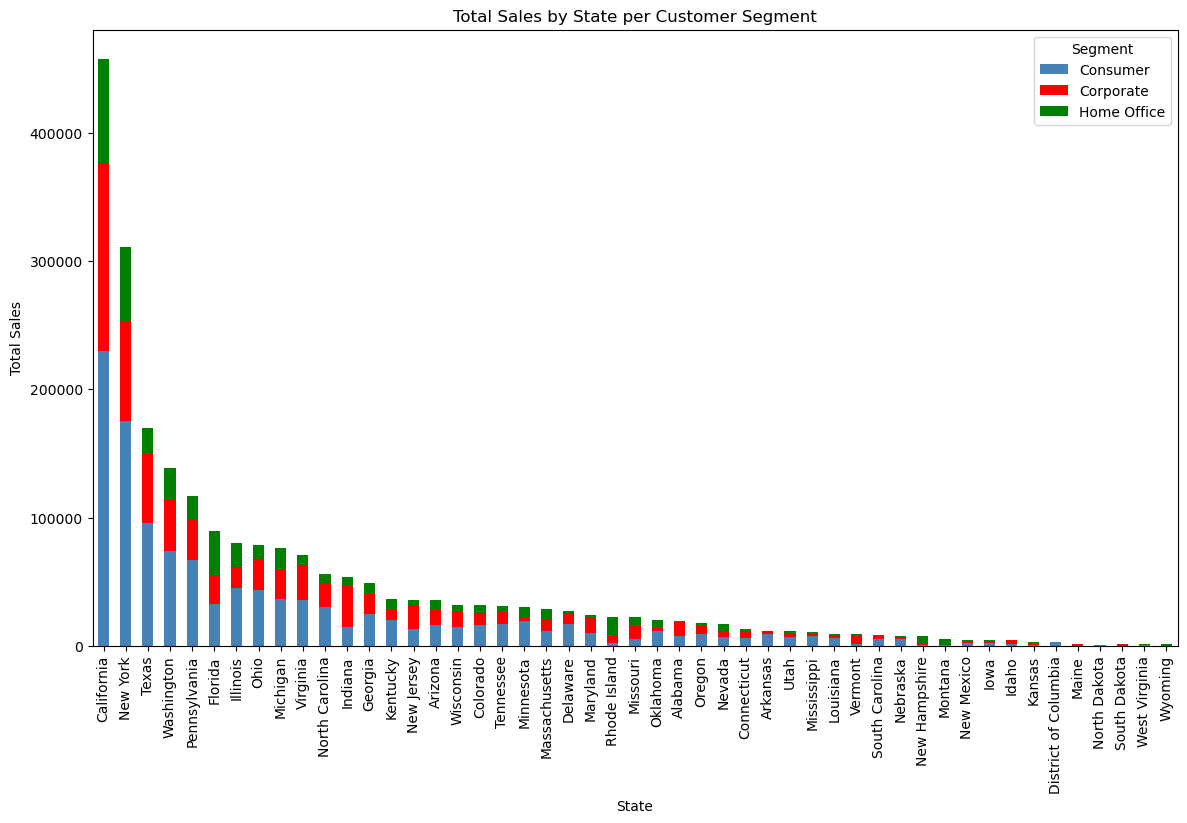

In [49]:
grouped_df = df.groupby(['State', 'Segment']).agg({'Sales':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Segment', values='Sales').reset_index()
grouped_df['Total'] = grouped_df['Consumer'] + grouped_df['Corporate'] + grouped_df['Home Office']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'], figsize=(14,8))
plt.title('Total Sales by State per Customer Segment')
plt.ylabel('Total Sales')
plt.show()

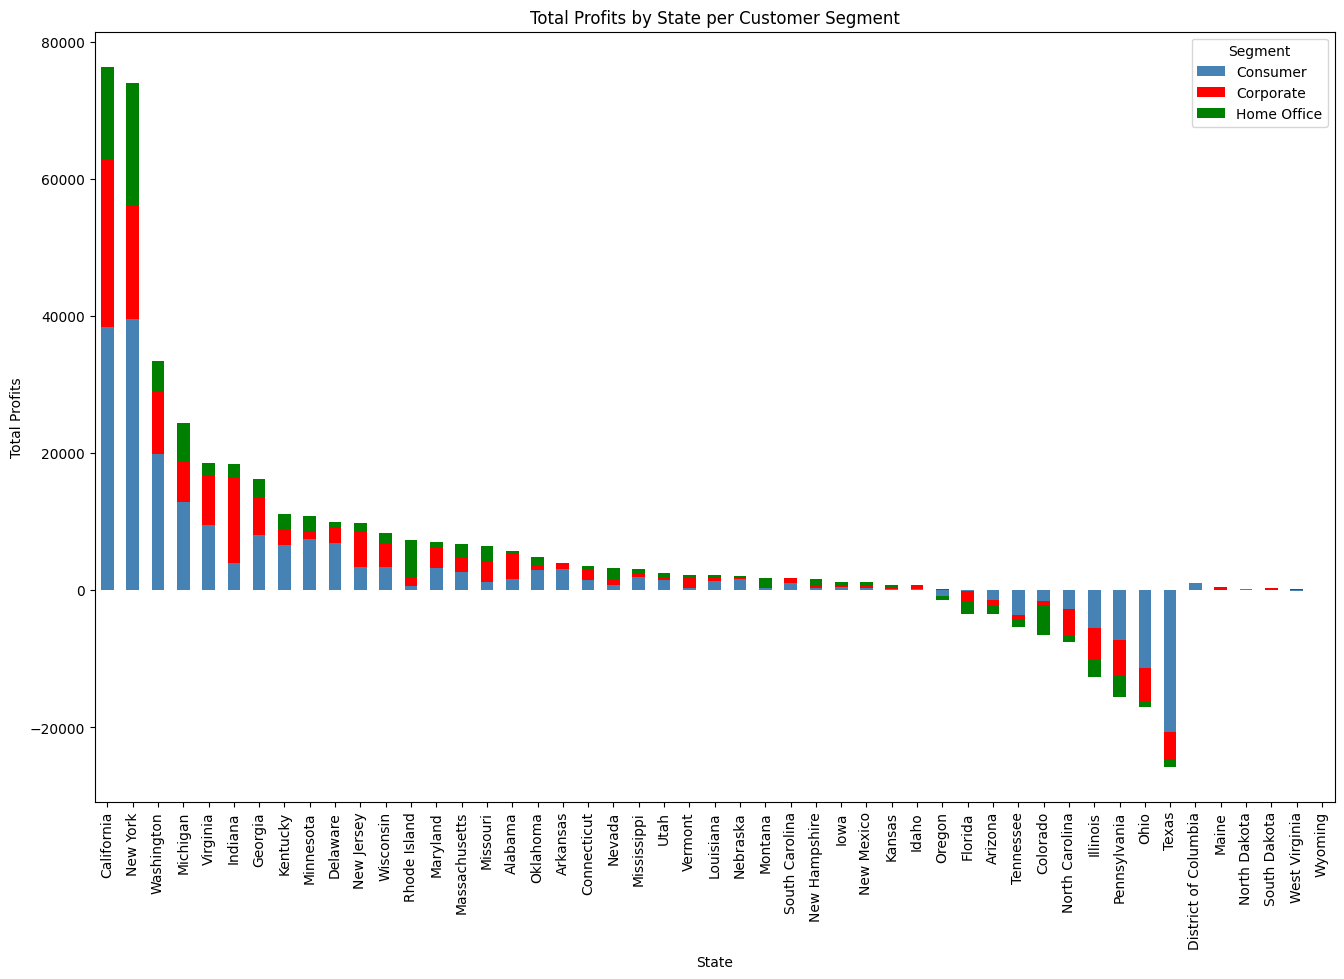

In [37]:
grouped_df = df.groupby(['State', 'Segment']).agg({'Profit':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Segment', values='Profit').reset_index()
grouped_df['Total'] = grouped_df['Consumer'] + grouped_df['Corporate'] + grouped_df['Home Office']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'], figsize=(16,10))
plt.title('Total Profits by State per Customer Segment')
plt.ylabel('Total Profits')
plt.show()

In [36]:
top10_p_states = ['California', 'New York', 'Washington', 'Michigan', 'Virginia', 'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware']
top10p_df = df[df['State'].isin(top10_p_states)]
top10p_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.0,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656


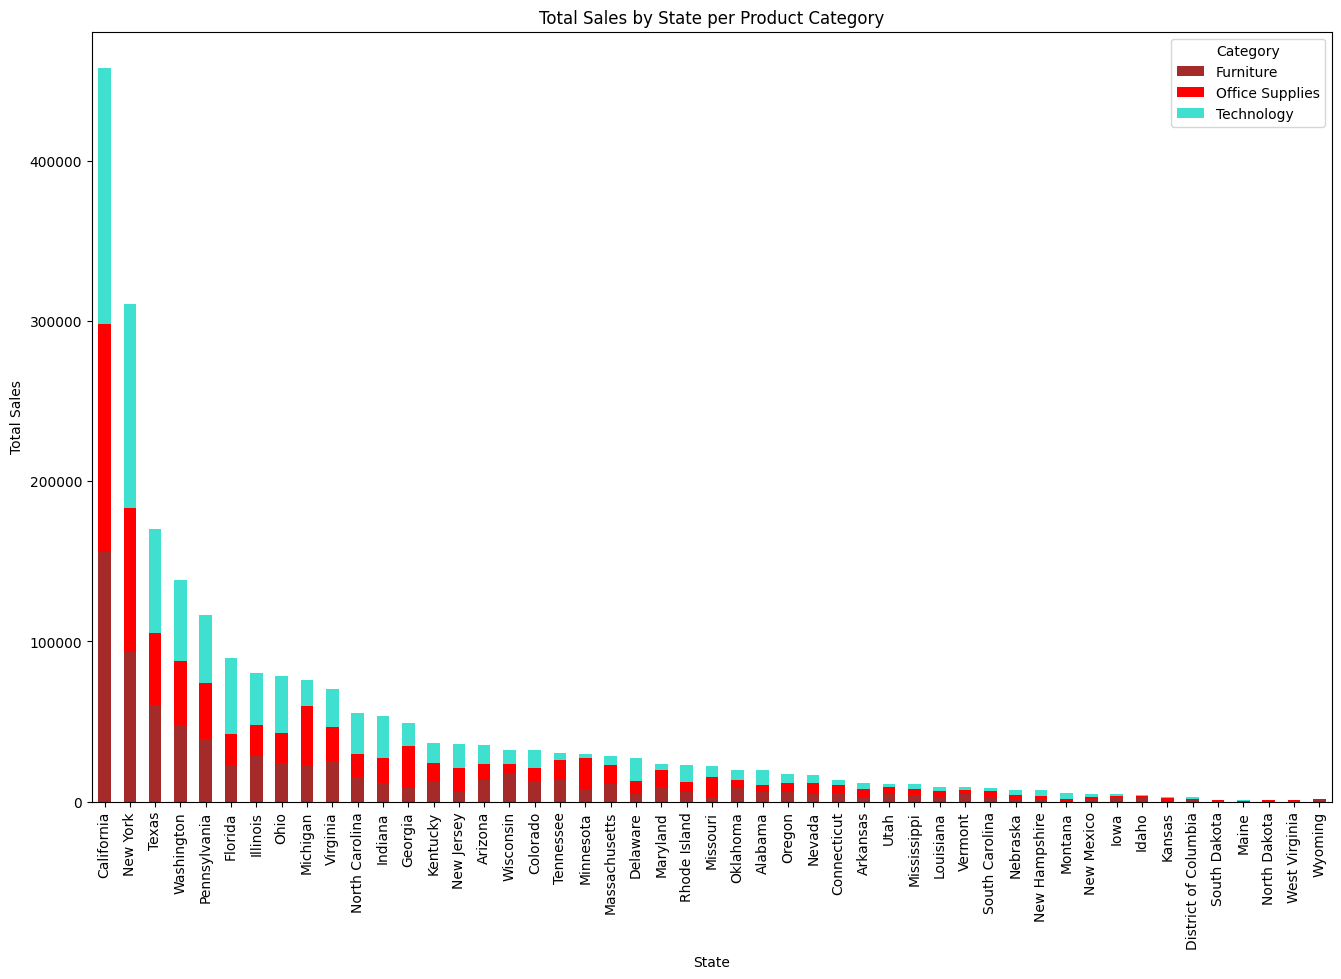

In [53]:
grouped_df = df.groupby(['State', 'Category']).agg({'Sales':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Category', values='Sales').reset_index()
grouped_df['Total'] = grouped_df['Furniture'] + grouped_df['Office Supplies'] + grouped_df['Technology']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color=['brown', 'red', 'turquoise'], figsize=(16,10))
plt.title('Total Sales by State per Product Category')
plt.ylabel('Total Sales')
plt.show()

Text(0.5, 1.0, 'Sales & Profit Average Over Time')

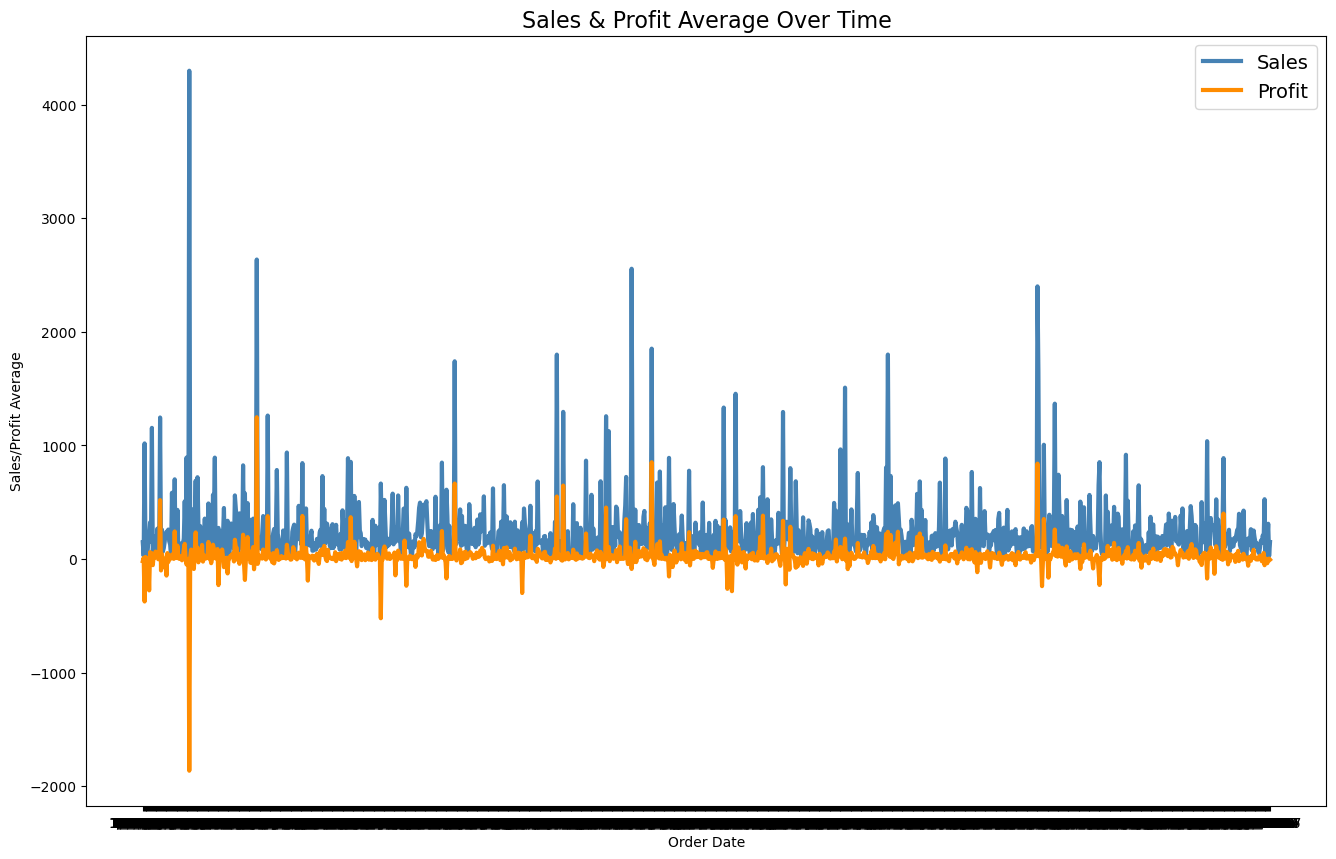

In [11]:
figure = plt.figure(figsize=(16,10))
time_df = df[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_df_avg = time_df.groupby('Order Date').agg({'Sales':'mean', 'Profit':'mean'})

plt.plot(time_df_avg.index, time_df_avg['Sales'], color='steelblue', label='Sales', linewidth=3)
plt.plot(time_df_avg.index, time_df_avg['Profit'], color='darkorange', label='Profit', linewidth=3)
plt.xlabel('Order Date')
plt.ylabel('Sales/Profit Average')
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time', size=16)

In [ ]:
## Feature Analysis & Transformation, PCA ##

In [12]:
model_df = df.copy()
model_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
model_df.drop(columns='Country', inplace=True)
model_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
model_df['Ship Date'].iloc[0]

'11/11/2016'

In [15]:
model_df['Product Name'].nunique()

1850

In [16]:
model_df.drop(columns='Product Name', inplace=True)

In [18]:
model_df['City'].nunique()

531

In [19]:
model_df.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID'], inplace=True)

In [20]:
model_df.drop(columns='Row ID', inplace=True)

In [21]:
model_df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [22]:
new_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Sales']
model_df_ra = model_df[new_cols].copy()

model_df_ra

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,41.9136,261.9600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,219.5820,731.9400
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,6.8714,14.6200
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,-383.0310,957.5775
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,2.5164,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,3,0.20,4.1028,25.2480
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,2,0.00,15.6332,91.9600
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,2,0.20,19.3932,258.5760
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,4,0.00,13.3200,29.6000


In [23]:
## Creates two variables, X and Y, which are copies of the Profit and Sales columns in the model_df_ra DataFrame.
This is done so that the Profit and Sales columns can be used separately for analysis or modeling.##

X = model_df_ra.loc[:, :'Profit'].copy()
y = model_df_ra.loc[:, 'Sales'].copy() 

In [25]:
#convert all of the categorical variables in the DataFrame X to numerical variables. 
This is often done as a preprocessing step before using machine learning algorithms, 
as many machine learning algorithms only work with numerical data#

X_dupe = X.copy()

for col in X_dupe.select_dtypes("object"):
    X_dupe[col], _ = X_dupe[col].factorize()

discrete_features = X_dupe.dtypes == int

In [26]:
##calculate the mutual information (MI) scores for each feature in the dataset X_dupe 
MI is a measure of how much information one variable contains about another##X_dupe

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit
0,0,0,0,0,0,0,0,2,0.00,41.9136
1,0,0,0,0,0,0,1,3,0.00,219.5820
2,0,1,1,1,1,1,2,2,0.00,6.8714
3,1,0,2,2,0,0,3,5,0.45,-383.0310
4,1,0,2,2,0,1,4,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,0,0,100,2,0,0,5,3,0.20,4.1028
9990,1,0,116,1,1,0,5,2,0.00,15.6332
9991,1,0,116,1,1,2,7,2,0.20,19.3932
9992,1,0,116,1,1,1,10,4,0.00,13.3200


In [37]:
mi_scores = mutual_info_regression(X_dupe, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_dupe.columns)
mi_scores = mi_scores.sort_values(ascending=False)

Text(0.5, 1.0, 'Mutual Information Scores')

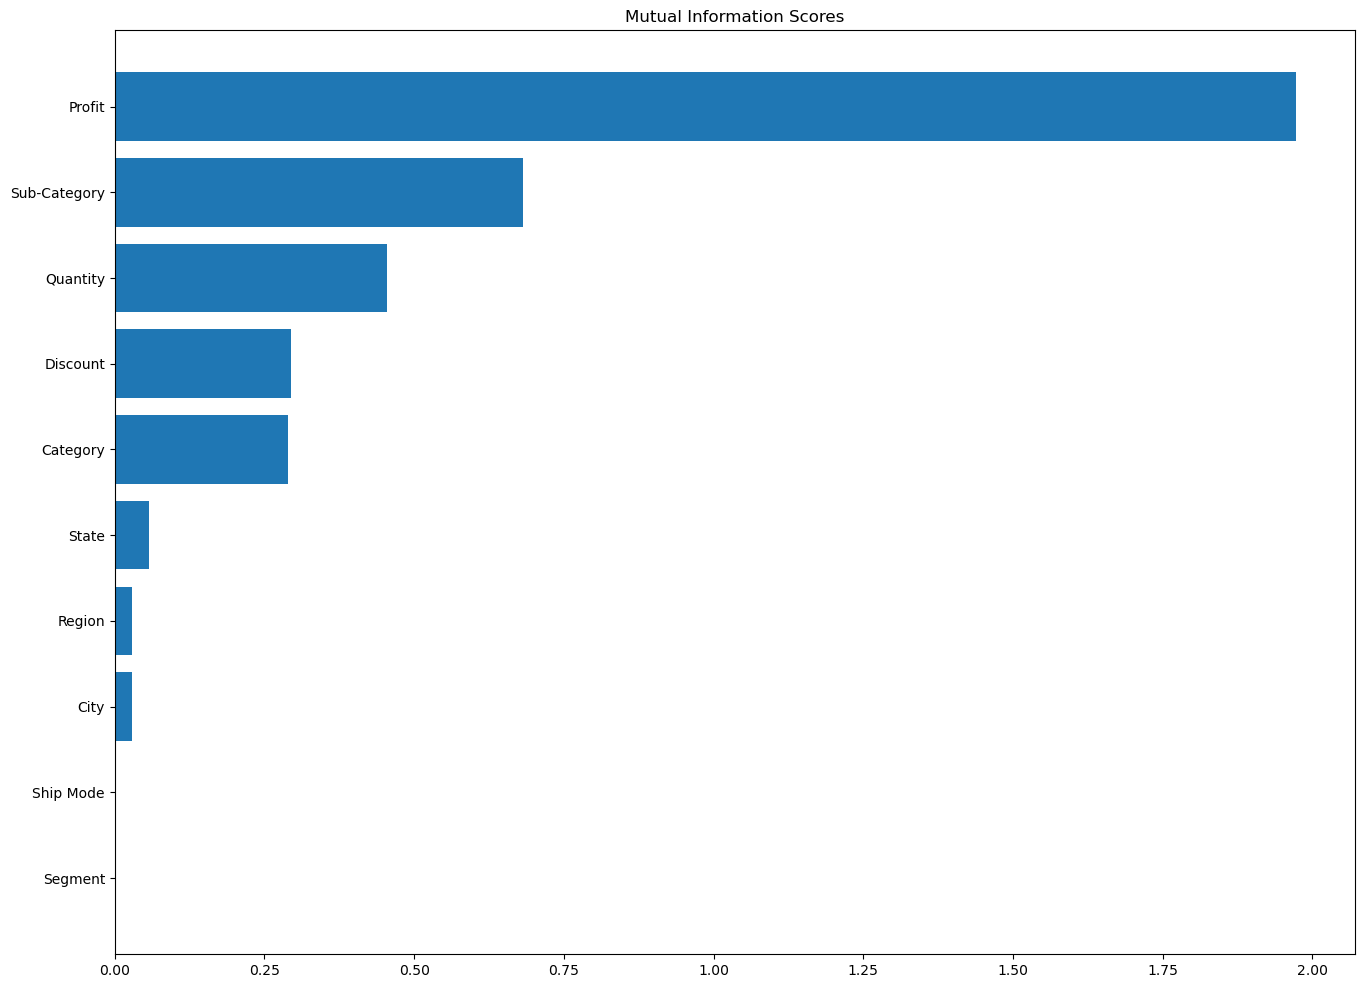

In [40]:
plt.figure(figsize=(16, 12))

mi_scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

In [33]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#The StandardScaler class is a preprocessing class from the sklearn.preprocessing module that scales the data to have a mean of 0 and a standard deviation of 1. 
The fit_transform method fits the scaler object to the data in X_dupe and then transforms the data using the fitted scaler. 
The transformed data is then stored in the X_scaled variable.

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dupe)
X_scaled

array([[-1.42553938, -0.86416091, -0.80807187, ..., -0.8043034 ,
        -0.75664349,  0.05659251],
       [-1.42553938, -0.86416091, -0.80807187, ..., -0.35486486,
        -0.75664349,  0.81505408],
       [-1.42553938,  0.44716981, -0.80002794, ..., -0.8043034 ,
        -0.75664349, -0.09300169],
       ...,
       [-0.09069064, -0.86416091,  0.12502376, ..., -0.8043034 ,
         0.21215332, -0.03954647],
       [-0.09069064, -0.86416091,  0.12502376, ...,  0.09457367,
        -0.75664349, -0.06547279],
       [-1.42553938, -0.86416091,  0.98572404, ..., -0.8043034 ,
        -0.75664349,  0.18907752]])

In [43]:
#scale the data, maybe we won't have much outliers in this sense but at least standardize then apply PCA#

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.436603,-1.017855,1.919374,0.565551,-0.244432,-1.591685,-0.991881,-0.151391,0.358278,-0.311602
1,-2.047423,-0.926384,2.292177,0.962610,-0.020761,-1.384218,-0.691786,0.270260,0.399621,-0.114841
2,-0.957130,-0.811834,0.996173,0.582354,-0.021026,-0.635593,-1.792383,-0.291542,-0.190941,-1.001700
3,-2.743904,-1.938746,-0.080589,-0.697688,0.685768,-0.286462,0.639638,-0.531075,0.876039,0.160859
4,-0.852313,-1.626001,0.747762,-0.140630,-0.697279,-0.876101,-0.076155,0.069706,0.658614,-0.701659
...,...,...,...,...,...,...,...,...,...,...
9989,-1.679436,-1.080641,1.348352,-0.380424,0.511267,-1.362670,-0.470604,0.375985,0.373897,0.633149
9990,-1.460351,-0.466146,1.099206,-0.003663,-0.889594,-1.014641,-0.096880,-0.142679,-0.467613,0.732838
9991,0.830791,-1.336087,0.075149,-0.559640,-0.484740,-0.954432,0.077669,0.281917,-0.395950,-1.166474
9992,0.541931,-0.940868,0.812244,-0.110548,-0.129744,-0.735801,0.393251,-0.465240,-0.522641,0.612084


In [44]:
X_pca_t = pd.DataFrame(
    pca.components_.T,
    columns = [f"PC{i+1}" for i in range(X_pca.shape[1])],
    index=X.columns
    )
X_pca_t

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Ship Mode,0.000788,-0.006914,-0.122503,-0.079533,-0.647826,0.486122,0.557663,-0.107825,0.002935,-0.001974
Segment,0.044100,0.109382,0.030020,-0.086019,0.061500,0.777086,-0.608107,0.011183,-0.014485,-0.004097
City,0.043260,0.409767,0.220991,-0.689464,0.103591,-0.042095,0.157089,0.218761,-0.469895,0.013528
State,0.112005,0.713774,-0.191882,-0.076429,0.055884,-0.059500,0.050721,-0.093843,0.644187,-0.047974
Region,0.020566,0.384115,-0.601056,0.430299,0.024692,-0.008893,-0.014991,0.059337,-0.547088,0.043212
Category,0.664879,-0.158898,-0.139646,-0.081908,0.038791,-0.021786,0.005481,-0.057464,-0.057580,-0.705585
Sub-Category,0.657830,-0.163985,-0.160724,-0.119065,0.055906,-0.008121,0.016232,-0.014347,0.048713,0.703083
Quantity,0.016832,0.013479,0.186130,0.218628,0.687058,0.362212,0.510913,-0.227004,-0.035734,0.002569
Discount,-0.205149,-0.283675,-0.512229,-0.242781,0.260134,0.137324,0.151249,0.623594,0.233305,-0.058458
Profit,0.256985,0.173976,0.441374,0.438508,-0.133145,0.061941,0.086839,0.695814,0.057456,-0.005194


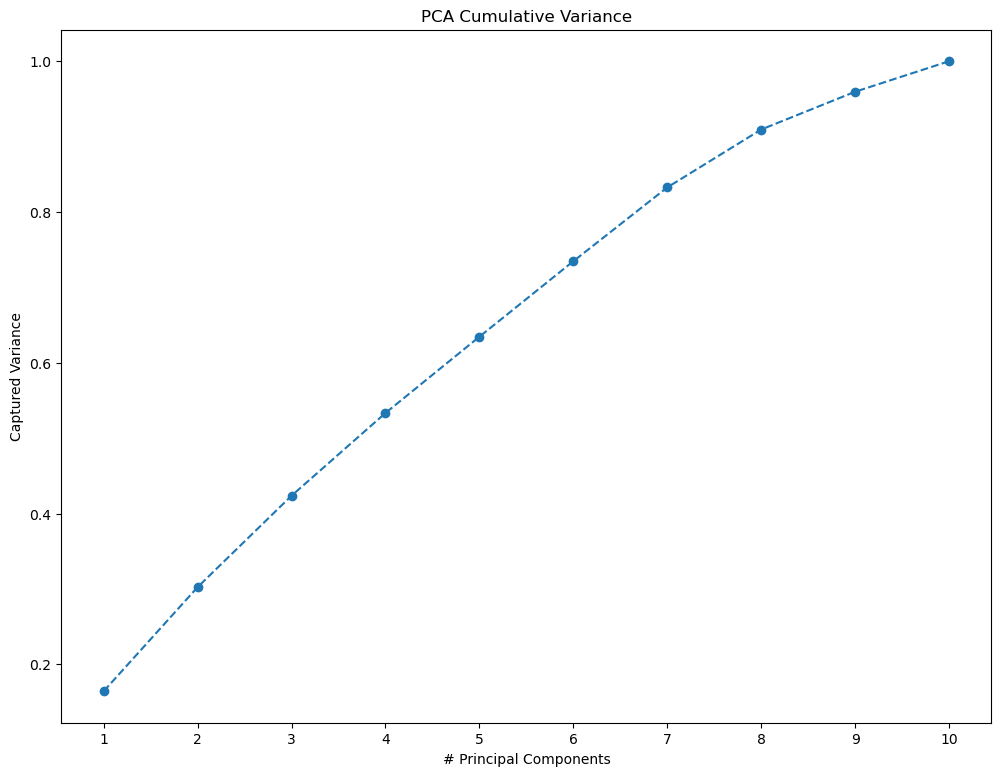

In [45]:
evr = pca.explained_variance_ratio_
n_comp = pca.components_

plt.figure(figsize=(12,9))
plt.plot(range(1, 10+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('PCA Cumulative Variance')
plt.xticks(range(1,11))
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

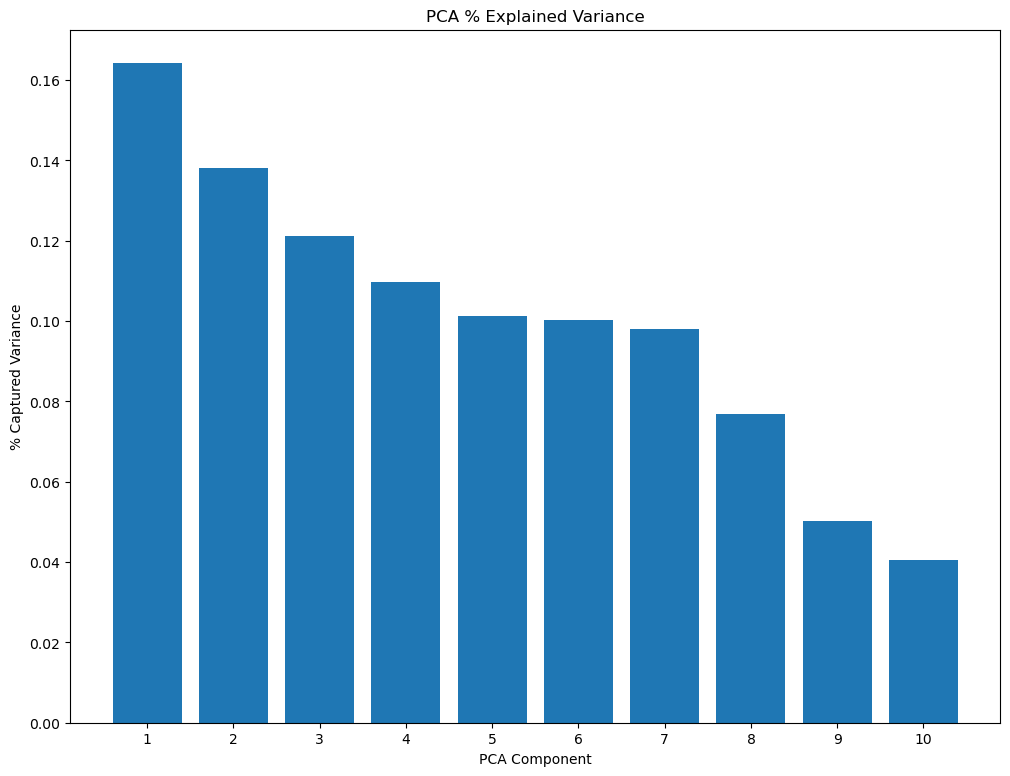

In [46]:
plt.figure(figsize=(12,9))
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
plt.bar(grid, evr)
plt.title('PCA % Explained Variance')
plt.xticks(range(1,11))
plt.xlabel('PCA Component')
plt.ylabel('% Captured Variance')
plt.show()

In [ ]:
Now using these PCA components, we can analyze what kind of features it found in the data.

For instance, we can get the indices of the first component and look at the differences in highly regarded variables and their relationships with the rest of the variables.

For PC1, it regards category and sub-category highly, while discount lower than the rest of the variables.

In [47]:
idx = X_pca['PC1'].sort_values(ascending=False).index
cols = model_df_ra.columns.tolist()
model_df_ra.loc[idx, cols]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,5,0.0,8399.9760,17499.950
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,4,0.0,6719.9808,13999.960
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,3,0.0,5039.9856,10499.970
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,4,0.2,3919.9888,11199.968
7666,Standard Class,Home Office,Providence,Rhode Island,East,Technology,Copiers,9,0.0,2591.9568,5399.910
...,...,...,...,...,...,...,...,...,...,...,...
1369,Standard Class,Consumer,Colorado Springs,Colorado,West,Furniture,Bookcases,7,0.7,-786.7440,590.058
9639,Second Class,Consumer,Concord,North Carolina,South,Furniture,Tables,13,0.4,-1862.3124,4297.644
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,7,0.5,-1665.0522,3083.430
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,8,0.8,-3701.8928,2177.584


In [48]:
X_pre = pd.DataFrame(X, columns=X.columns.tolist()) #using the scaled X instead of the original X
X_pcas = X_pre.join(X_pca) #So that everything is on the same scale.
X_pcas.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,41.9136,-2.436603,-1.017855,1.919374,0.565551,-0.244432,-1.591685,-0.991881,-0.151391,0.358278,-0.311602
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,219.5820,-2.047423,-0.926384,2.292177,0.962610,-0.020761,-1.384218,-0.691786,0.270260,0.399621,-0.114841
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,6.8714,-0.957130,-0.811834,0.996173,0.582354,-0.021026,-0.635593,-1.792383,-0.291542,-0.190941,-1.001700
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,-383.0310,-2.743904,-1.938746,-0.080589,-0.697688,0.685768,-0.286462,0.639638,-0.531075,0.876039,0.160859
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,2.5164,-0.852313,-1.626001,0.747762,-0.140630,-0.697279,-0.876101,-0.076155,0.069706,0.658614,-0.701659
